<a href="https://colab.research.google.com/github/vitroid/yamanashi-water/blob/main/basin/basin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 流域の情報と地目の情報を融合する。

In [1]:
try:
    # On Google Colab
    from google.colab import drive
    drive.mount('/content/drive')

    BASEDIR="drive/MyDrive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/basin/"
except:
    BASEDIR="./"

Mounted at /content/drive


## 流域

国が管理していると思われる。

[流域界ポリゴンデータ](http://cgisj.jp/data_type_description.php?data_type=Ryuuiki)というものがある。

[ここ](https://nlftp.mlit.go.jp/ksj/gmlold/datalist/gmlold_KsjTmplt-W12.html)から山梨と神奈川をまず入手。

In [2]:
import geopandas as gpd

山梨shape = f"{BASEDIR}W12-52A-19-01.1_GML/W12-52A_19_WatershedBoundary.shp"
山梨gdf = gpd.read_file(山梨shape)
山梨gdf

,W12_001,W12_002,W12_003,geometry
0,0,83029,0271,"POLYGON ((138.94697 35.91200, 138.94517 35.913..."
1,0,83029,0274,"POLYGON ((138.87467 35.90239, 138.87439 35.902..."
2,0,83029,0276,"POLYGON ((138.91158 35.91667, 138.91094 35.915..."
3,0,83029,0277,"POLYGON ((138.94697 35.91200, 138.94775 35.908..."
4,0,83029,0278,"POLYGON ((138.85953 35.86161, 138.86372 35.863..."
...,...,...,...,...
850,0,85554,0077,"POLYGON ((138.40525 35.15750, 138.40664 35.156..."
851,0,85554,0078,"POLYGON ((138.40175 35.19717, 138.40350 35.197..."
852,0,85554,0081,"POLYGON ((138.48281 35.09106, 138.48239 35.089..."
853,0,85554,0170,"POLYGON ((138.46347 35.13717, 138.46294 35.138..."


データは手に入った。水系域コードと単位流域コードの意味がわからない。

|属性名|説明|属性の型|
|-|-|-|
|水系域コード （W12_002）	|水系域を一意に識別するための番号。 管轄地建番号（2桁）＋水系域番号（3桁）。|	コードリスト「[旧水系域コード](https://nlftp.mlit.go.jp/ksj/gmlold/codelist/OldWaterSystemCd.html)」
|単位流域コード（W12_003）	|単位流域に対し、水系域毎に下流から上流に向かって与える4桁の一連番号。単位流域とは、単位流路（河口点、合流点、分流点、最上流点、1流路上の河川名称の変わる地点、湖沼の流入・流出口、非集水域界と流路との交叉点により分断された河川区間）の下流端における流域から、その上流端における流域を除いた地域である。	|文字列型 （CharacterString）|

旧水域系コードを見ても、具体的な数値の意味はわからない。結局、既知の地図と重ねてみるしかないようだ。まずやってみよう。

<Axes: >

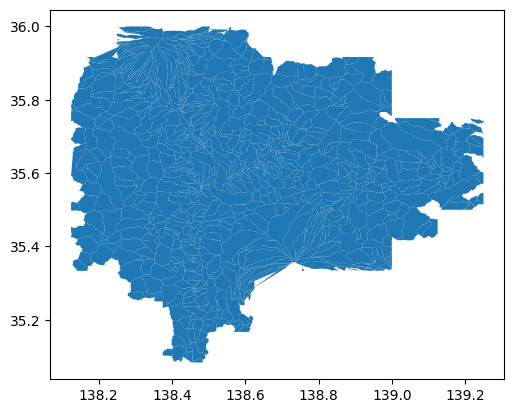

In [4]:
import matplotlib

山梨gdf["geometry"].plot()

<Axes: >

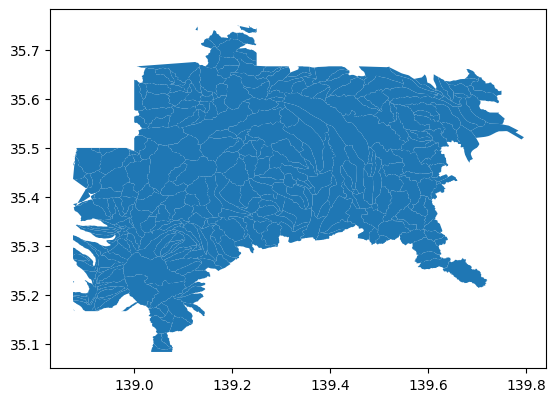

In [5]:
神奈川shape = f"{BASEDIR}W12-52A-14-01.1_GML/W12-52A_14_WatershedBoundary.shp"
神奈川gdf = gpd.read_file(神奈川shape)
神奈川gdf.plot()

[水系域データ](https://nlftp.mlit.go.jp/ksj/gmlold/datalist/gmlold_KsjTmplt-W03.html)をみつけた。XML形式。とりあえず入手し、pandasで読んでみる。


In [6]:
import pandas as pd

df=pd.read_xml(f"{BASEDIR}W03-07T-48-01.0_GML/W03-07T.xml")
df

,description,EnvelopeWithTimePeriod,id,waterSystemCode,riverCode,unitValleyCode,sequenceNumberInUnitValley,upstreamUnitValleyCode,splitFlowType,rightSideUnitValley,populationInUnitValley,populationInNonWatershed,upstreamPopulation,populationInUpstreamNonWatershed,PresenceOfMouthOfRiver,PresenceOfUpstreamBorder,upstreamSplitFlow,streamLength,upstreamLength,riverName
0,国土数値情報 InstanceName インスタンス文書,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,None,NaN,fi_1,81001.0,1.0,1.0,0.0,0.0,0.0,0.0,4222.0,11.0,143199.0,108876.0,1.0,0.0,0.0,NaN,NaN,天塩川
3,None,NaN,fi_2,81001.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,138881.0,108836.0,0.0,0.0,0.0,NaN,NaN,天塩川
4,None,NaN,fi_3,81001.0,1.0,7.0,0.0,0.0,0.0,0.0,18.0,3.0,138789.0,108826.0,0.0,0.0,0.0,NaN,NaN,天塩川
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37755,None,NaN,fi_37754,90603.0,3.0,3.0,0.0,0.0,0.0,0.0,397.0,384.0,397.0,384.0,1.0,0.0,0.0,NaN,NaN,名蔵川
37756,None,NaN,fi_37755,90603.0,4.0,4.0,0.0,0.0,0.0,0.0,329.0,0.0,329.0,0.0,1.0,0.0,0.0,NaN,NaN,仲間川
37757,None,NaN,fi_37756,90603.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,クイラ川
37758,None,NaN,fi_37757,90603.0,6.0,6.0,0.0,0.0,0.0,0.0,142.0,0.0,142.0,0.0,1.0,0.0,0.0,NaN,NaN,仲良川


読み方がわからないが、とりあえず「相模川」を含む行を抜きだしてみよう。

In [7]:
subdf = df.dropna(subset=["riverName"])
subdf[subdf["riverName"].str.contains('相模川')].loc[:,"waterSystemCode"]

11609    82025.0
15946    83032.0
15947    83032.0
15948    83032.0
15949    83032.0
15950    83032.0
15951    83032.0
15952    83032.0
15953    83032.0
15954    83032.0
15955    83032.0
15956    83032.0
15957    83032.0
Name: waterSystemCode, dtype: float64

In [8]:
set(subdf[subdf["riverName"].str.contains('相模川')].loc[:,"waterSystemCode"].astype(int))

{82025, 83032}

In [9]:
set(subdf[subdf["riverName"].str.contains('鹿留川')].loc[:,"waterSystemCode"].astype(int))

{83032}

鹿留川と相模川の流域コードが共通になっている?この場合、鹿留川流域だけを特定するにはどうしたらいいのか。

In [10]:
set(subdf[subdf["riverName"].str.contains('河口湖')].loc[:,"waterSystemCode"].astype(int))

set()

In [11]:
import pandas as pd
gdf = pd.concat([山梨gdf, 神奈川gdf], axis=0, ignore_index=True)

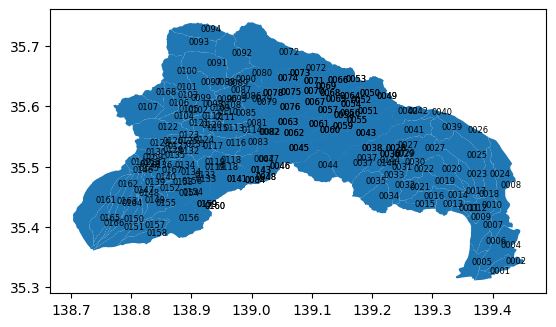

In [12]:
ax = gdf[gdf["W12_002"]=="83032"]["geometry"].plot()

for i in range(len(gdf)):
    if gdf.loc[i, "W12_002"] != "83032":
        continue
    p = gdf.loc[i, "geometry"].centroid
    # if type(p) is gpd.geoseries.GeoSeries:
    #     p = p.iloc[0]
    ax.annotate(f"{gdf.loc[i, 'W12_003']}", (p.x, p.y), size=6)


W12_003番号が大きいものは、番号が小さいものの上流だそうな。でも、それだけの情報ではトポロジーがわからない。

Leaflet(Folium)の地図に、geopandasの輪郭を重ねがきする方法。

https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html

In [13]:
import folium

m = folium.Map(location=[35.6897, 139.6916])
m

In [14]:
for _, r in gdf.iterrows():
    p = r["geometry"].centroid
    folium.Marker(
        location=[p.y, p.x],
        popup=f"{r['W12_002']}",
    ).add_to(m)
    if r["W12_002"] not in ("83032", "83953", "83954"): # 相模川、河口湖、西湖
        continue
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "red"})
    folium.Popup(r["W12_003"]).add_to(geo_j)
    geo_j.add_to(m)


m

河口湖が相模川の流域に含まれていない! なんてこった。とりあえず、西湖と河口湖をとりこむ。

分水嶺を確認するために、立体情報を見たくなってきた。Foliumで等高線描けないかな。←あとで。

北岡君が作った流域図を、この流域図に重ねることで、4流域への分割ができないか。Y-1〜Y-9の9分割ならなおいい。

[国土数値情報 河川データ](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-W05.html)で川筋が描けるので、上のマーキングと重ねることで、W12_003の数字と支流の対応はできないことはない。巨大なマップを作ってみるか。

次に進もう。Foliumに重ねたのは、実際の地形との重なりを知りたかったせい。まだ支流への割当てができてないが、それはともかく、次は土地利用データをひろう。